In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Data Preparation


In [3]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised= True, shuffle_files= True, split= ['train'])  #Loading Pre existing data from tensorflow datasets

In [ ]:
dataset

#Data Splitting

In [4]:
def splits(dataset, Train_ratio, Val_ratio, Test_ratio):
  Dataset_size = len(dataset)

  train_dataset = dataset.take(int(Train_ratio*Dataset_size))

  val_test_dataset = dataset.skip(int(Train_ratio*Dataset_size))
  val_dataset = val_test_dataset.take(int(Val_ratio*Dataset_size))

  test_dataset = val_test_dataset.skip(int(Test_ratio*Dataset_size))

  return train_dataset, val_dataset, test_dataset



In [5]:
Train_ratio = 0.6
Val_ratio = 0.2
Test_ratio = 0.2

#dataset = tf.data.Dataset.range(10)

train_dataset, val_dataset, test_dataset = splits(dataset[0], Train_ratio, Val_ratio, Test_ratio)
print(list(train_dataset.take(1).as_numpy_iterator()),
      list(val_dataset.take(1).as_numpy_iterator()),
      list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [6]:
print(train_dataset, val_dataset, test_dataset)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <_SkipDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


#Data Vizualization

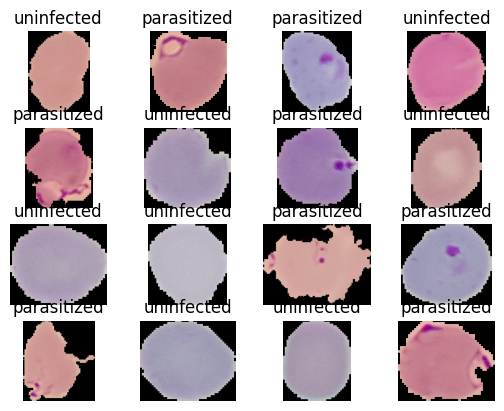

In [7]:
for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4,4 , i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [ ]:
dataset_info.features

#Data Preprocessing

In [8]:
# Normalization : X = (X  - Xmin) / (Xmax - Xmin)
# Standardization : X = (X - MEAN) / S.D

# HERE NORMALIZATION IS PREFFERRED AS THERE IS NO SPECIFIC MEAN. DATA CAN BE ANYWHERE BETWEEN 0 - 255.
# 1. DATA IS RESIZED TO 225,225
# 2. DATA IS THEN NORMALIZED (X - 0) / (255  - 0)

**Rescaling And Resizing (Normalization)**

In [9]:
im_size  =224
def resize_rescale(image, label):
  return tf.image.resize(image, (im_size, im_size))/255.0, label



In [10]:
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)


In [11]:
for image,label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


**Shuffling**

In [12]:
Batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration= True).batch(Batch_size).prefetch(tf.data.AUTOTUNE)
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [13]:
val_dataset = val_dataset.shuffle(buffer_size=8, reshuffle_each_iteration= True).batch(Batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [14]:
test_dataset = test_dataset.shuffle(buffer_size=8, reshuffle_each_iteration= True).batch(Batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
#WHY CONVOLUTIONAL NEURON NETWORKS ??
#WHEN DEALING WITH LARGE NUMBER OF INPUTS NEURONS, MODEL BECOMES INSCALABLE
#EXAMPLE : 224 * 224 * 3 => 150528 (INPUT LAYER)
#          1000 NEURONS IN DENSE LAYER
#THIS IMPLIES EACH DDENSE LAYER NEURON OUTPUT NEEDS 150528 INPUT NEURON PARAMETERS TO OBTAIN OUTPUT => 150528000
#TRAINING THE MODEL IN THIS METHOD IS TIME CONSUMING AND INEFFICIENT
#CNN TAKE ONLY A PART OF THE INPUT LAYER TO GENERATE OUTPUT OF THE DENSE LAYER NEURON

#SO IN ORDER TO GENERATE A 2X2 MATRIX FROM A 4X4 MATRIX,
#WE NEED 64 PARAMETERS IN TRADITIONAL NEURON NETWORK
#BUT IN CNN WE JUST NEED 9 PARAMETERS

# (W out) = (((W in) - F + 2P)/S) + 1
# (H out) = (((H in) - F + 2P)/S) + 1

# W = Width, H = Height, F = Kernel size, P = Padding, S = Stride

#CNN GENERALLY MOVES FROM FEATURE EXTRACTION TO CLASSIFICATION



# Model Training

In [15]:
model = tf.keras.Sequential([
                            InputLayer(input_shape = (im_size, im_size, 3)),

                            Conv2D(filters = 6, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
                            BatchNormalization(),
                            MaxPool2D(pool_size= 2, strides= 2),


                            Conv2D(filters = 16, kernel_size = 3, strides = 1, padding = 'valid', activation = 'relu'),
                            BatchNormalization(),
                            MaxPool2D(pool_size= 2, strides= 2),

                            Flatten(),

                            Dense(100, activation = 'relu'),
                            BatchNormalization(),
                            Dense(10, activation = 'relu'),
                            BatchNormalization(),
                            Dense(1, activation = 'sigmoid')

                            ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 16)      64        
 chNormalization)                                                
                                                        

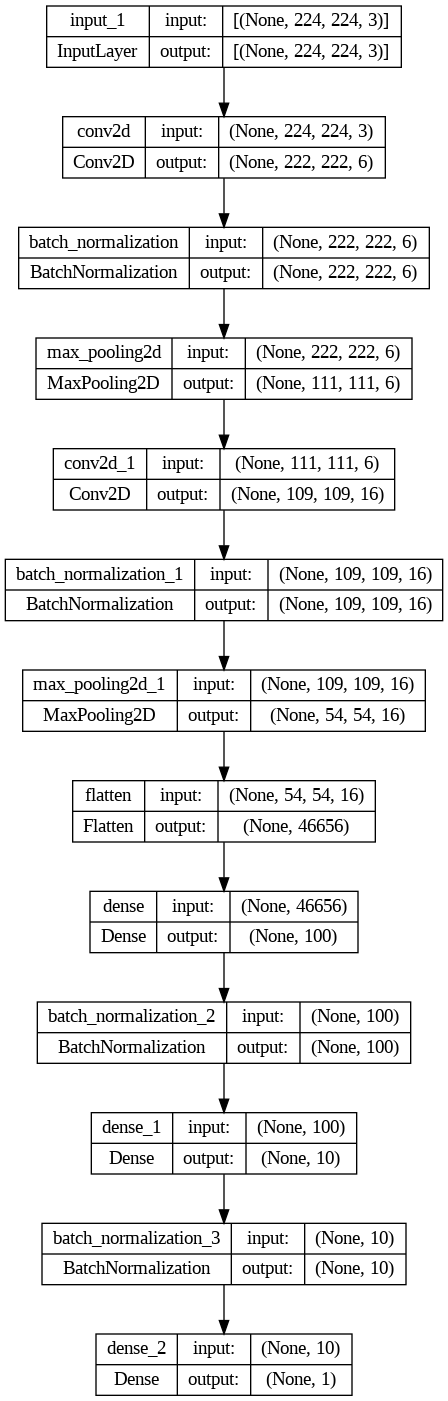

In [16]:
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes= True)

In [ ]:
# BINARY CROSS ENTROPY : LLOSS FUNCTION
# Binary Cross Entropy, also known as Binary Log Loss or Binary Cross-Entropy Loss,
#is a commonly used loss function in machine learning, particularly in binary classification problems.
#It is designed to measure the dissimilarity between the predicted probability distribution and the true binary labels of a dataset.

# LOG LOSS = 1/N  Σ(i=1 to N) { - [Yi * log(Pi) + (1 - Yi) * (log(1 - Pi))] }
# Yi = Actual Value, Pi = Predicted Probability, N = unique Ids

# NOTE :  In parameters of BinaryCrossentropy(), 'from_logits' is False for range {0,1} and True for other ranges.

In [17]:
model.compile(optimizer= Adam(learning_rate = 0.01 ),
              loss = BinaryCrossentropy(),
              metrics = 'accuracy'
              )

In [ ]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs= 20, verbose= 1)

Epoch 1/20
517/517 [==============================] - 648s 1s/step - loss: 0.5038 - accuracy: 0.7471 - val_loss: 0.3138 - val_accuracy: 0.8741
Epoch 2/20
517/517 [==============================] - 632s 1s/step - loss: 0.2362 - accuracy: 0.9138 - val_loss: 0.4032 - val_accuracy: 0.8891
Epoch 3/20
517/517 [==============================] - 626s 1s/step - loss: 0.1989 - accuracy: 0.9295 - val_loss: 0.2006 - val_accuracy: 0.9345
Epoch 4/20
517/517 [==============================] - 634s 1s/step - loss: 0.1778 - accuracy: 0.9376 - val_loss: 0.1863 - val_accuracy: 0.9390
Epoch 5/20
517/517 [==============================] - 645s 1s/step - loss: 0.1633 - accuracy: 0.9445 - val_loss: 0.2236 - val_accuracy: 0.9305
Epoch 6/20
517/517 [==============================] - 644s 1s/step - loss: 0.1513 - accuracy: 0.9508 - val_loss: 0.2175 - val_accuracy: 0.9428
Epoch 7/20
517/517 [==============================] - 640s 1s/step - loss: 0.1521 - accuracy: 0.9485 - val_loss: 0.4008 - val_accuracy: 0.9075

In [ ]:
model.evaluate(test_dataset)

In [ ]:
def par_or_not(x):
  if (x < 0.5):
    return str('P')
  else:
    return str('U')

In [ ]:
for i, (image,label) in enumerate(test_dataset.take(9)):
  ax = plt.subplot(3,3, i + 1)
  plt.imshow(image[0])
  plt.title(str(par_or_not(label.numpy()[0])) + ":" + str(par_or_not(model.predict(image)[0][0])))

  plt.axis('off')